In [1]:
%reload_kedro
# Standard libraries
import os
import random

# Third-party libraries
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - General
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

# Model Interpretability
import shap


[01/01/24 04:03:58] INFO     Resolved project path as:                                              ]8;id=711267;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=430885;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/joelmashana/IRP/joel-mashana-dissertation-project.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/01/24 04:03:58] INFO     Kedro project Joel Mashana Dissertation Project                        ]8;id=14127;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=521072;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=25888;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=978727;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=916799;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=9613;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
DT = catalog.load('decision_tree_final_model')

[01/01/24 04:03:59] INFO     Loading data from 'decision_tree_final_model' (PickleDataSet)...   ]8;id=198111;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=990777;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

In [3]:
X_train = catalog.load("X_train_main")
y_train = catalog.load("y_train_main")
X_test = catalog.load("X_test_main")
y_test = catalog.load("y_test_main")
decision_tree_params = catalog.load("params:decision_tree")

                    INFO     Loading data from 'X_train_main' (CSVDataSet)...                   ]8;id=259831;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=680119;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'y_train_main' (CSVDataSet)...                   ]8;id=683286;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=555931;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'X_test_main' (CSVDataSet)...                    ]8;id=958992;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=603074;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'y_test_main' (CSVDataSet)...                    ]8;id=254141;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=485218;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'params:decision_tree' (MemoryDataset)...        ]8;id=393162;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=69747;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

In [4]:
def evaluate_and_return_final_decision_tree_model(X_train, y_train, X_test, y_test, model_name):
    # Create and fit the pipeline
    pipeline = make_pipeline_imb(
        StandardScaler(),
        SMOTE(random_state=42),
        DecisionTreeClassifier(
            criterion='entropy',
            max_depth=6,  
            min_samples_split=10,
            min_samples_leaf=42,
            random_state=42
        )
    )
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = pipeline.predict(X_test)
    
    print('Model:', model_name)
    extracted_model = pipeline.named_steps['decisiontreeclassifier']
    explainer = shap.Explainer(extracted_model, X_train)
    
    
    shap_values = explainer(X_train)
    print(type(shap_values))
    print(shap_values.shape)
    

    return {
        'shap_values': shap_values,
        'expected_value': explainer.expected_value
    }

In [5]:
results = evaluate_and_return_final_decision_tree_model(X_train, y_train, X_test, y_test, decision_tree_params)
shap_values = results['shap_values']

Model: Decision Tree
<class 'shap._explanation.Explanation'>
(2907, 15, 2)


Class 0 SHAP Values:


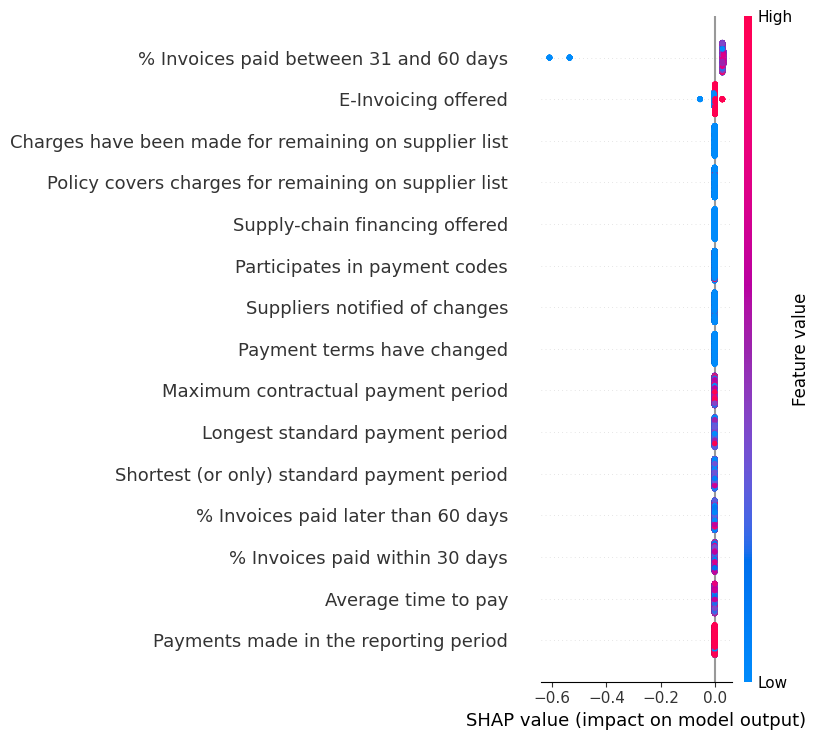

Class 1 SHAP Values:


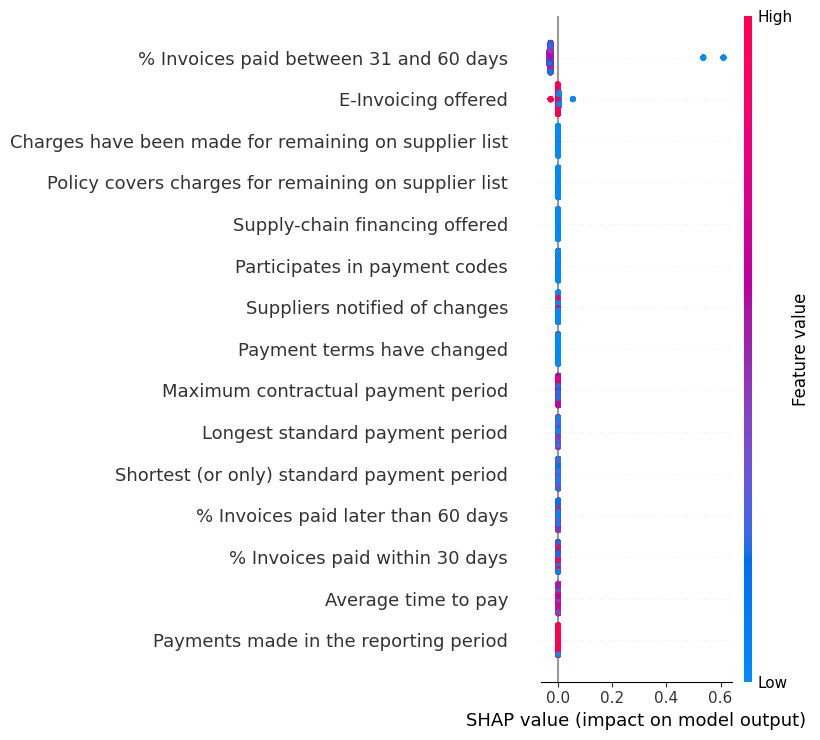

In [6]:
num_classes = shap_values.values.shape[-1]
for i in range(num_classes):
    class_shap_values = shap_values.values[..., i]
    print(f"Class {i} SHAP Values:")
    shap.summary_plot(class_shap_values, X_train)